In [31]:
import pandas as pd
file_path = 'data.csv'
df = pd.read_csv(file_path)



In [32]:
print(df.head(0))

Empty DataFrame
Columns: [id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, backdrop_path, budget, homepage, tconst, original_language, original_title, overview, popularity, poster_path, tagline, genres, production_companies, production_countries, spoken_languages, keywords, directors, writers, averageRating, numVotes, cast]
Index: []

[0 rows x 29 columns]


In [ ]:

print(df.shape)
df = df.drop(columns=['backdrop_path'])
df = df.drop(columns=['homepage'])
df = df.drop(columns=['tconst'])
df = df.drop(columns=['original_title'])# нет новой информации

print(df.shape)
df=df.drop_duplicates()
print(df.shape)
# индексы непонятные или ссылки



(432152, 29)
(432152, 25)
(432152, 25)


In [34]:
# Считаем количество NaN в каждой колонке
nan_count_per_column = df.isna().sum()

# Выводим количество NaN по каждой колонке
print(nan_count_per_column)

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date             17762
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
overview                 41030
popularity                   0
poster_path              73897
tagline                 341225
genres                   76848
production_companies    170156
production_countries    110794
spoken_languages        100799
keywords                261518
directors                10343
writers                  66995
averageRating                0
numVotes                     0
cast                     68264
dtype: int64


In [35]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].fillna(pd.to_datetime('1711-01-01'))
columns_to_replace = [
    'overview',  'tagline', 'genres', 'production_companies',
    'production_countries', 'spoken_languages', 'keywords', 'directors', 'writers','cast'
]

# Заменяем NaN и None значения на 'Empty!' в указанных колонках
df[columns_to_replace] = df[columns_to_replace].fillna('Empty!')



In [ ]:
unique = df['adult'].unique()
unique_count = len(unique)

print(f"Уникальные значения в колонке : {unique}")
print(f"Количество уникальных значений: {unique_count}")



Уникальные значения в колонке : [False  True]
Количество уникальных значений: 2


In [ ]:
df_filtered = df[['id', 'title', 'poster_path','averageRating']]
df_filtered.to_csv('poster_data.csv', index=False)
df = df.drop(columns=['poster_path'])

df_filtered = df[['id', 'title', 'cast', 'directors', 'writers','averageRating']]
df_filtered.to_csv('people_data.csv', index=False)
df = df.drop(columns=['cast'])
df = df.drop(columns=['directors'])
df = df.drop(columns=['writers'])



df_filtered = df[['id', 'title', 'tagline', 'keywords', 'overview','averageRating']]
df_filtered.to_csv('language_data.csv', index=False)
df = df.drop(columns=['tagline'])
df = df.drop(columns=['keywords'])
df = df.drop(columns=['overview'])




In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['year'] = df['release_date'].dt.year.astype(int)  
df['month_name'] = df['release_date'].dt.strftime('%B')  
df = df.drop(columns=['release_date'])



In [40]:
print(df.head(2))

       id         title  vote_average  vote_count    status    revenue  \
0   27205     Inception         8.364       34495  Released  825532764   
1  157336  Interstellar         8.417       32571  Released  701729206   

   runtime  adult     budget original_language  popularity  \
0      148  False  160000000                en      83.952   
1      169  False  165000000                en     140.241   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   

                     spoken_languages  averageRating  numVotes  year  \
0  English, French, Japanese, Swahili            8.8   2622502  2010   
1          

In [ ]:
df['genres'] = df['genres'].str.split(', ')  
df = df.explode('genres')  
df['genres'] = df['genres'].str.strip()

df['production_companies'] = df['production_companies'].str.split(', ')  
df = df.explode('production_companies')  
df['production_companies'] = df['production_companies'].str.strip()

df['production_countries'] = df['production_countries'].str.split(', ')  
df = df.explode('production_countries')  
df['gproduction_countries'] = df['production_countries'].str.strip()



In [ ]:
unique_languages = pd.Series(df['spoken_languages'].str.split(', ').explode().unique()).tolist()
print(unique_languages)
languages_population = {
    'English': 1500000000,
    'French': 300000000,
    'Japanese': 125000000,
    'Swahili': 160000000,
    'Mandarin': 1000000000,
    'Spanish': 500000000,
    'Hindi': 600000000,
    'Russian': 260000000,
    'Xhosa': 19000000,
    'Persian': 80000000,
    'Urdu': 230000000,
    'Arabic': 310000000,
    'German': 100000000,
    'Swedish': 10000000,
    'Italian': 69000000,
    'Romanian': 25000000,
    'Korean': 80000000,
    'Norwegian': 5300000,
    'Latin': 0,  # мертвый язык
    'Tagalog': 28000000,
    'Hungarian': 13000000,
    'Cantonese': 86000000,
    'Turkish': 75000000,
    'Greek': 13000000,
    'Malay': 30000000,
    'Czech': 10000000,
    'Polish': 45000000,
    'Hebrew': 9000000,
    'Dutch': 24000000,
    'Vietnamese': 86000000,
    'Yiddish': 1000000,
    'Tamil': 78000000,
    'Finnish': 5000000,
    'Somali': 16000000,
    'Nepali': 17000000,
    'Tibetan': 1700000,
    'Portuguese': 250000000,
    'Gaelic': 600000,
    'Albanian': 7000000,
    'Thai': 70000000,
    'Indonesian': 270000000,
    'Danish': 6000000,
    'Irish': 1300000,
    'Estonian': 1300000,
    'Afrikaans': 7000000,
    'Chichewa; Nyanja': 12000000,
    'Sotho': 6000000,
    'Zulu': 12000000,
    'Sinhalese': 17000000,
    'Khmer': 16000000,
    'Bulgarian': 8000000,
    'Icelandic': 350000,
    'Samoan': 200000,
    'Bengali': 230000000,
    'Esperanto': 2000000,
    'Haitian; Haitian Creole': 12000000,
    'Ukrainian': 30000000,
    'Breton': 200000,
    'Croatian': 5000000,
    'Inuktitut': 35000,
    'Armenian': 6000000,
    'Sanskrit': 250000,  
    'Georgian': 4000000,
    'Pushto': 50000000,
    'Burmese': 33000000,
    'Northern Sami': 2500,
    'Slovak': 5000000,
    'Quechua': 8000000,
    'Navajo': 17000,
    'No Language': 0,
    'Serbian': 13000000,
    'Serbo-Croatian': 22000000, 
    'Welsh': 1000000,
    'Moldavian': 3000000,
    'Cornish': 500,  
    'Lithuanian': 3000000,
    'Fulah': 25000000,
    'Punjabi': 125000000,
    'Catalan': 10000000,
    'Akan': 11000000,
    'Maltese': 500000,
    'Amharic': 32000000,
    'Ido': 1000,
    'Cree': 250000,
    'Corsican': 100000,
    'Bambara': 8000000,
    'Marathi': 125000000,
    'Maori': 200000,
    'Galician': 3000000,
    'Guarani': 5000000,
    'Belarusian': 4000000,
    'Basque': 7000000,
    'Telugu': 83000000,
    'Lingala': 15000000,
    'Tswana': 5000000,
    'Wolof': 5000000,
    'Bosnian': 3500000,
    'Mongolian': 3500000,
    'Tatar': 6000000,
    'Lao': 7000000,
    'Slovenian': 2000000,
    'Aragonese': 100000,
    'Gujarati': 56000000,
    'Chechen': 1500000,
    'Latvian': 1800000,
    'Malayalam': 38000000,
    'Macedonian': 2500000,
    'Tahitian': 15000,
    'Azerbaijani': 32000000,
    'Avaric': 750000,
    'Uzbek': 34000000,
    'Kazakh': 16000000,
    'Occitan': 2000000,
    'Chuvash': 1500000,
    'Igbo': 45000000,
    'Kurdish': 30000000,
    'Hausa': 53000000,
    'Afar': 2000000,
    'Kannada': 55000000,
    'Javanese': 82000000,
    'Raeto-Romance': 60000,
    'Kashmiri': 7000000,
    'Dzongkha': 700000,
    'Ewe': 7000000,
    'Ganda': 8000000,
    'Sardinian': 1500000,
    'Letzeburgesch': 400000,
    'Inupiaq': 1000,
    'Bislama': 20000,
    'Bashkir': 2000000,
    'Kinyarwanda': 12000000,
    'Abkhazian': 100000,
    'Tonga': 2000000,
    'Aymara': 3000000,
    'Sango': 1000000,
    'Yoruba': 45000000,
    'Uighur': 12000000,
    'Assamese': 33000000,
    'Kirghiz': 4000000,
    'Pali': 200000,  
    'Frisian': 500000,
    'Kongo': 7000000,
    'Tajik': 9000000,
    'Yi': 9000000,
    'Kalaallisut': 50000,
    'Kikuyu': 6000000,
    'Ossetian; Ossetic': 500000,
    'Norwegian Bokmål': 4500000,
    'Walloon': 1000000,
    'Malagasy': 25000000,
    'Rundi': 10000000,
    'Sundanese': 39000000,
    'Twi': 11000000,
    'Marshall': 60000,
    'Faroese': 50000,
    'Limburgish': 1000000,
    'Shona': 16000000,
    'Sindhi': 27000000,
    'Herero': 3000000,
    'Nauru': 1000,
    'Tigrinya': 8000000,
    'Hiri Motu': 100000,
    'Ojibwa': 180000,
    'Ndebele': 2000000,
    'Turkmen': 7000000,
    'Norwegian Nynorsk': 700000,
    'Slavic': 0, 
    'Oromo': 37000000,
    'Oriya': 38000000,
    'Fijian': 900000,
    'Venda': 2000000,
    'Divehi': 350000,
    'Interlingue': 1000,
    'Interlingua': 10000,
    'Swati': 2000000,
    'Ndonga': 1000000,
    'Volapük': 1000
}


['English', 'French', 'Japanese', 'Swahili', 'Mandarin', 'Spanish', 'Hindi', 'Russian', 'Xhosa', 'Persian', 'Urdu', 'Arabic', 'German', 'Swedish', 'Italian', 'Romanian', 'Korean', 'Norwegian', 'Latin', 'Tagalog', 'Hungarian', 'Cantonese', 'Turkish', 'Greek', 'Malay', 'Czech', 'Polish', 'Hebrew', 'Dutch', 'Vietnamese', 'Yiddish', 'Tamil', 'Finnish', 'Somali', 'Nepali', 'Tibetan', 'Portuguese', 'Gaelic', 'Albanian', 'Thai', 'Indonesian', 'Danish', 'Irish', 'Estonian', 'Afrikaans', 'Chichewa; Nyanja', 'Sotho', 'Zulu', 'Sinhalese', 'Khmer', 'Bulgarian', 'Icelandic', 'Samoan', 'Bengali', 'Esperanto', 'Haitian; Haitian Creole', 'Ukrainian', 'Breton', 'Croatian', 'Inuktitut', 'Armenian', 'Sanskrit', 'Georgian', 'Pushto', 'Burmese', 'Northern Sami', 'Slovak', 'Quechua', 'Navajo', 'No Language', 'Serbian', 'Serbo-Croatian', 'Welsh', 'Moldavian', 'Empty!', 'Cornish', 'Lithuanian', 'Fulah', 'Punjabi', 'Catalan', 'Akan', 'Maltese', 'Amharic', 'Ido', 'Cree', 'Corsican', 'Bambara', 'Marathi', 'Maori

In [ ]:
def get_population(languages_str):
    languages = [lang.strip() for lang in languages_str.split(', ')]
    total_population = sum(languages_population.get(lang, 0) for lang in languages)
    return total_population
df['population_sum'] = df['spoken_languages'].apply(get_population)
df = df.drop(columns=['spoken_languages'])



In [44]:
df.to_csv('main_data.csv', index=False)


In [ ]:
df_unique = df.drop_duplicates(subset=['id', 'production_countries'])
average_rating_per_group = df_unique.groupby(['production_countries'])['averageRating'].mean().reset_index()

print(average_rating_per_group['production_countries'])
average_rating_per_group[['production_countries']].to_clipboard(index=False, excel=True)


0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
236             Yemen
237        Yugoslavia
238             Zaire
239            Zambia
240          Zimbabwe
Name: production_countries, Length: 241, dtype: object


In [ ]:
average_prevalence_per_group = df_unique.groupby(['production_countries'])['population_sum'].mean().reset_index()

print(average_prevalence_per_group['production_countries'])
average_prevalence_per_group[['production_countries']].to_clipboard(index=False, excel=True)

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
236             Yemen
237        Yugoslavia
238             Zaire
239            Zambia
240          Zimbabwe
Name: production_countries, Length: 241, dtype: object


In [ ]:
average_budget_per_group = df_unique.groupby(['production_countries'])['budget'].mean().reset_index()

print(average_budget_per_group['production_countries'])
average_budget_per_group[['production_countries']].to_clipboard(index=False, excel=True)

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
236             Yemen
237        Yugoslavia
238             Zaire
239            Zambia
240          Zimbabwe
Name: production_countries, Length: 241, dtype: object


In [49]:
country_counts = df_unique.groupby('production_countries').size().reset_index(name='count')


In [50]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd

# Укажите путь к скачанному файлу shapefile
file_path = "D:/dasha/geopandas_data/ne_110m_admin_0_countries.shp"

# Загружаем данные о странах
world = gpd.read_file(file_path)

# Получаем список стран
country_list = world['NAME'].unique()

# Выводим список стран
print(country_list)
#ЧАТ ГПТ спрашиваем

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

In [51]:
country_dict  = {
    "Cote D'Ivoire": "Côte d'Ivoire",
    "Czech Republic": "Czechia",
    "Czechoslovakia": "Czechia",
    "Equatorial Guinea": "Eq. Guinea",
    "Falkland Islands": "Falkland Is.",
    "Macedonia": "North Macedonia",
    "Palestinian Territory": "Palestine",
    "South Georgia and the South Sandwich Islands": "South Georgia and the South Sandwich Islands",
    "Swaziland": "eSwatini",
    "Syrian Arab Republic": "Syria",
    "Timor-Leste": "Timor-Leste",
    "Democratic Republic of the Congo": "Dem. Rep. Congo",
    'Central African Republic':'Central African Rep.',
    "Soviet Union": "Soviet Union",
    "St. Kitts and Nevis": "St. Kitts and Nevis",
    "St. Pierre and Miquelon": "St. Pierre and Miquelon",
    "St. Vincent and the Grenadines": "St. Vincent and the Grenadines",
    "Western Sahara": "W. Sahara",
    "Libyan Arab Jamahiriya": "Libya",
    "Yugoslavia": "Yugoslavia",
    "Congo": "Dem. Rep. Congo",
    "Dominican Republic": "Dominican Rep.",
    "Antarctica": "Fr. S. Antarctic Lands",
    "Lao People's Democratic Republic": "Laos",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Solomon Islands": "Solomon Is.",
    "Brunei Darussalam": "Brunei",
    "Northern Cyprus": "N. Cyprus",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "South Sudan": "S. Sudan"
}



In [52]:
average_rating_per_group['production_countries'] = average_rating_per_group['production_countries'].replace(country_dict)
average_prevalence_per_group['production_countries'] = average_prevalence_per_group['production_countries'].replace(country_dict)
average_prevalence_per_group['population_sum'] = average_prevalence_per_group['population_sum'] / 1_000_000
average_budget_per_group['production_countries'] = average_budget_per_group['production_countries'].replace(country_dict)
country_counts['production_countries'] = country_counts['production_countries'].replace(country_dict)


In [53]:
print(average_rating_per_group)
print(average_prevalence_per_group)
print(average_budget_per_group)
print(country_counts)

    production_countries  averageRating
0            Afghanistan       6.834951
1                Albania       7.082283
2                Algeria       6.552688
3         American Samoa       4.000000
4                Andorra       5.893750
..                   ...            ...
236                Yemen       6.644444
237           Yugoslavia       6.708394
238                Zaire       5.800000
239               Zambia       6.900000
240             Zimbabwe       6.723810

[241 rows x 2 columns]
    production_countries  population_sum
0            Afghanistan      731.563107
1                Albania      153.412598
2                Algeria      550.811828
3         American Samoa     1500.200000
4                Andorra      769.125000
..                   ...             ...
236                Yemen     1187.666667
237           Yugoslavia      152.186087
238                Zaire      315.000000
239               Zambia     1552.285714
240             Zimbabwe     1212.976190

[24

In [ ]:
average_rating_per_group.rename(columns={'production_countries': 'NAME'}, inplace=True)
average_prevalence_per_group.rename(columns={'production_countries': 'NAME'}, inplace=True)
average_budget_per_group.rename(columns={'production_countries': 'NAME'}, inplace=True)
country_counts.rename(columns={'production_countries': 'NAME'}, inplace=True)

file_path = "D:/dasha/geopandas_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(file_path)
unique_continents = world['NAME'].unique()
world = pd.merge(world, average_rating_per_group, on='NAME', how='left')
world = pd.merge(world, average_prevalence_per_group, on='NAME', how='left')
world = pd.merge(world, average_budget_per_group, on='NAME', how='left')
world = pd.merge(world, country_counts, on='NAME', how='left')

world['averageRating'].fillna(1, inplace=True)
world['population_sum'].fillna(1, inplace=True)
world['budget'].fillna(1, inplace=True)
world['count'].fillna(1, inplace=True)



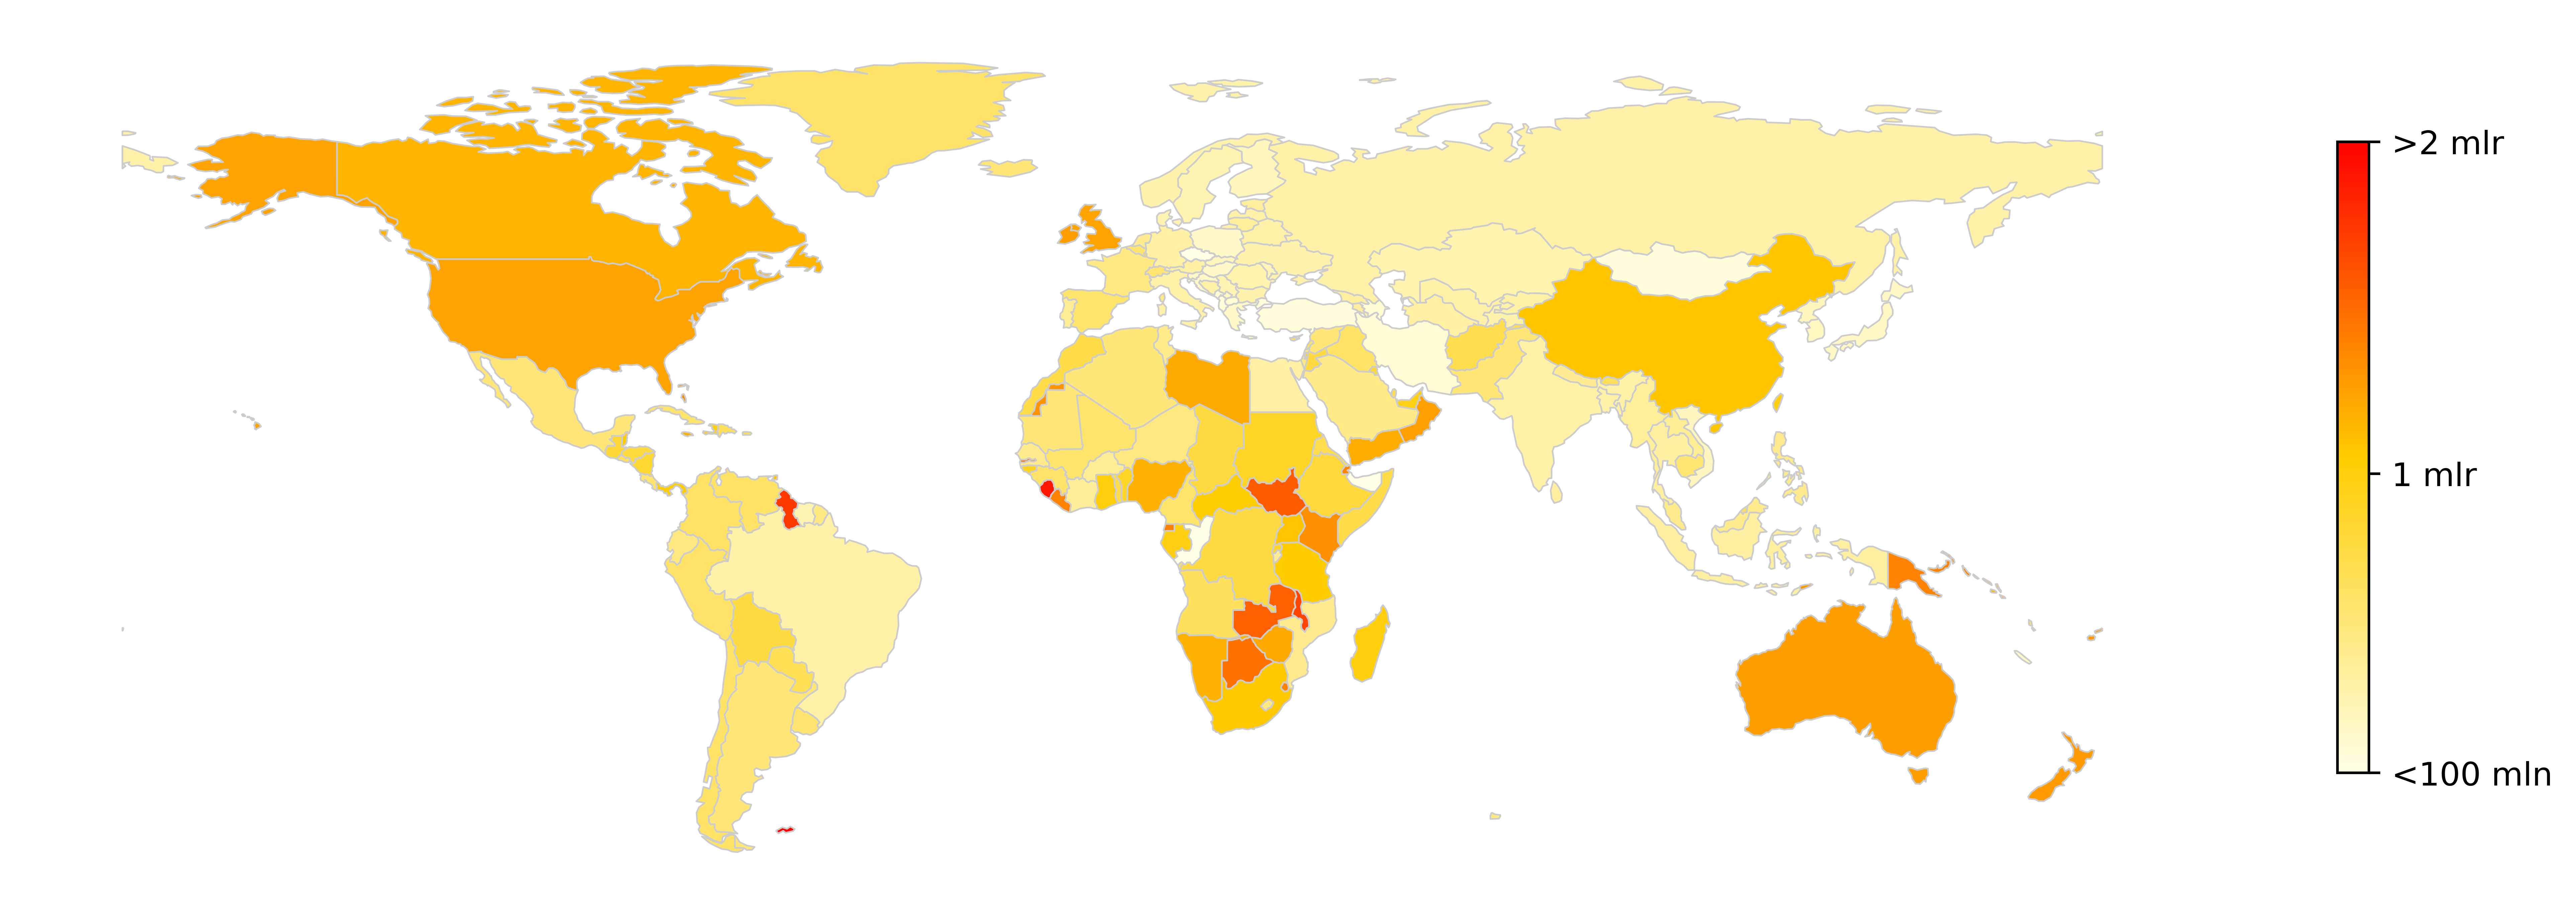

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

world = world[world['NAME'] != 'Antarctica']

norm = Normalize(vmin=100, vmax=2000)

fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=700)

colors = [(1, 1, 0.9), (1, 0.8, 0), (1, 0, 0)]  
positions = [0, 0.33, 0.66, 1]
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=1024)  

plot = world.plot(column='population_sum', cmap=cmap, alpha=1, linewidth=0.5, ax=ax, edgecolor='0.8', legend=False, norm=norm)

cbar = fig.colorbar(plot.get_children()[0], ax=ax, shrink=0.5) 
cbar.set_ticks([99,1000, 2000])  
cbar.set_ticklabels([ '<100 mln','1 mlr', '>2 mlr'])

ax.set_title('')
ax.set_axis_off()

plt.show()


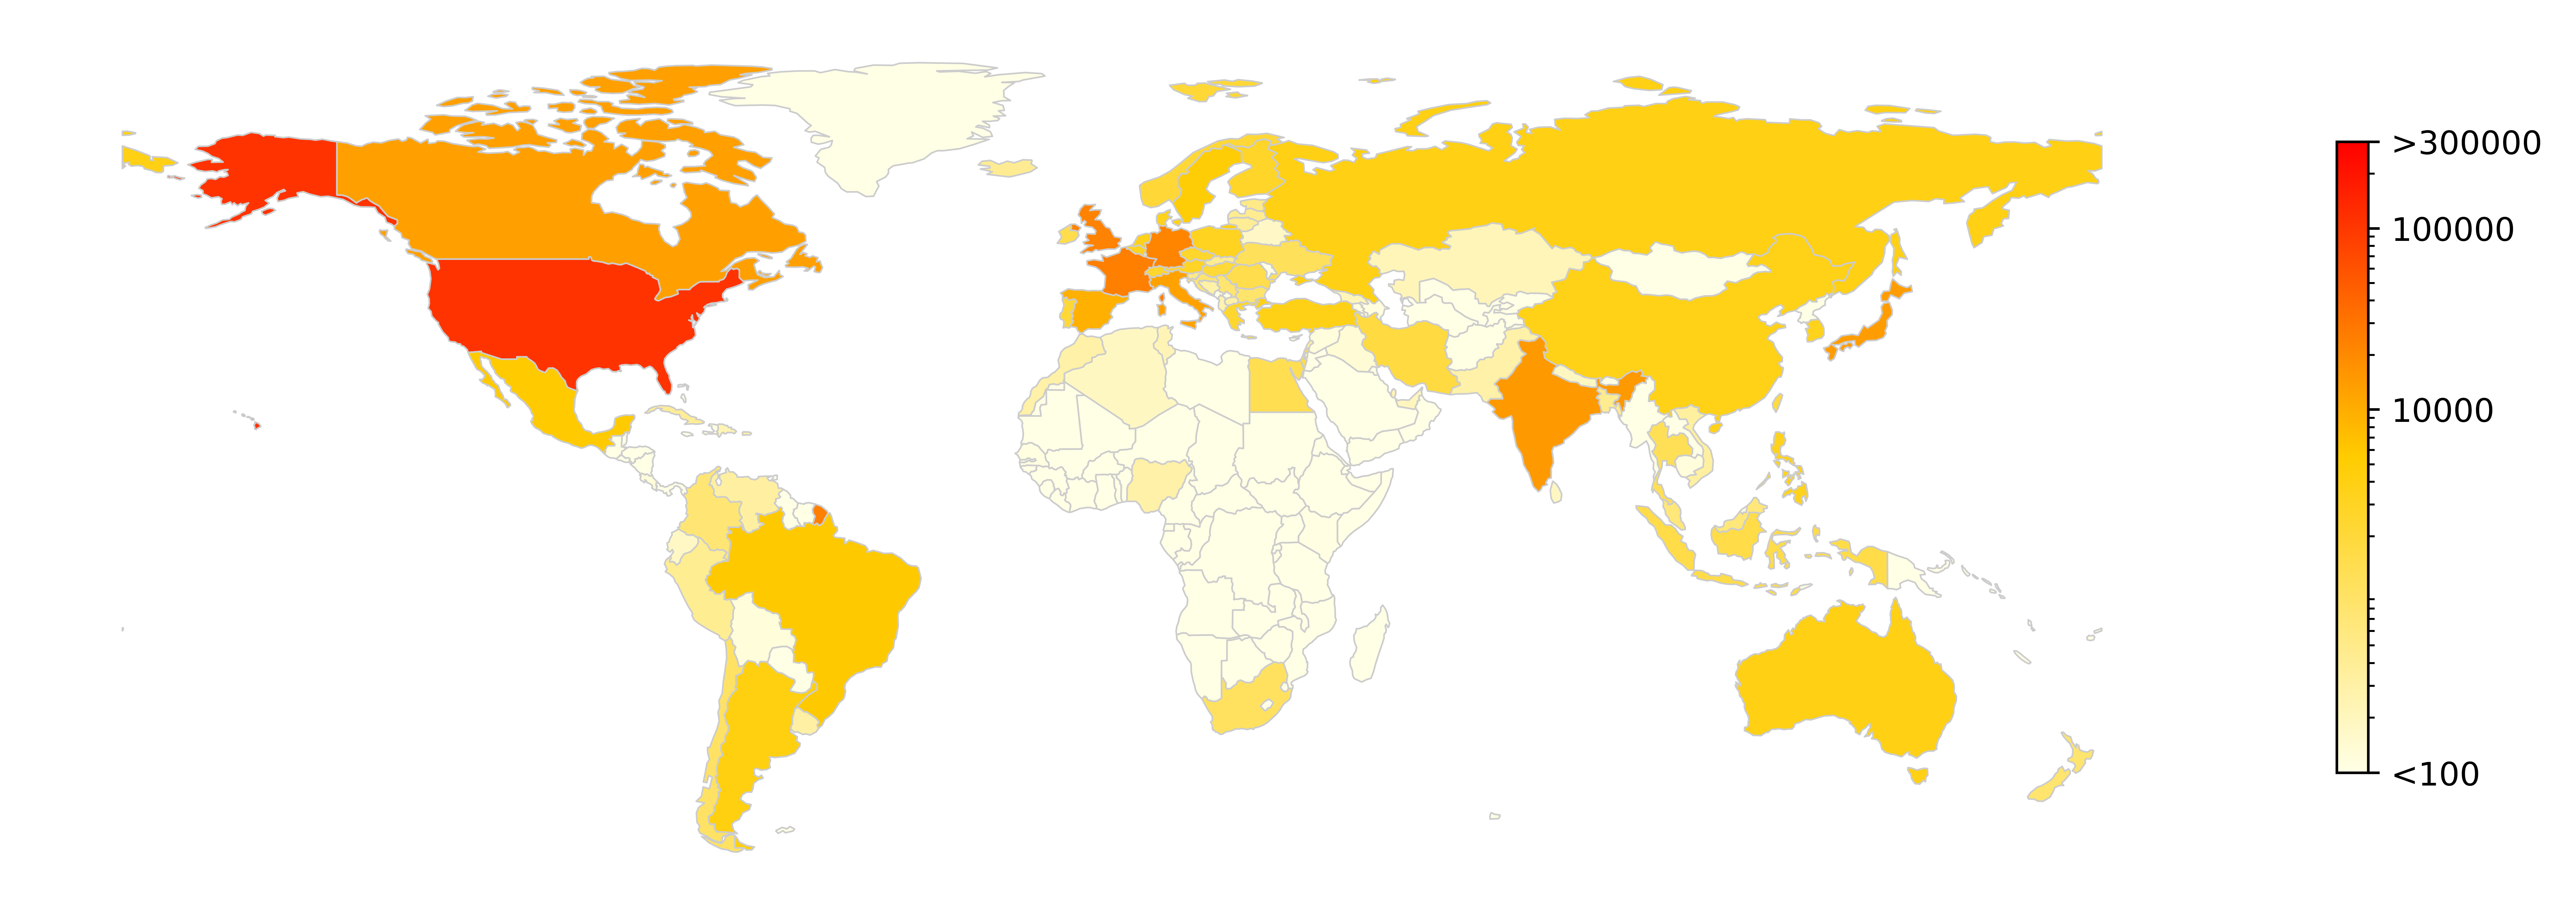

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

world = world[world['NAME'] != 'Antarctica']

norm = LogNorm(vmin=100, vmax=300000)

# Рисование тепловой карты
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=700)

colors = [(1, 1, 0.9), (1, 0.8, 0), (1, 0, 0)]  
positions = [0, 0.33, 0.66, 1]
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=1024)  

plot = world.plot(column='count', cmap=cmap, alpha=1, linewidth=0.5, ax=ax, edgecolor='0.8', legend=False, norm=norm)

cbar = fig.colorbar(plot.get_children()[0], ax=ax, shrink=0.5)  
cbar.set_ticks([99,10000,100000, 300000])  
cbar.set_ticklabels([ '<100 ','10000','100000', '>300000 '])

ax.set_title('')
ax.set_axis_off()

plt.show()


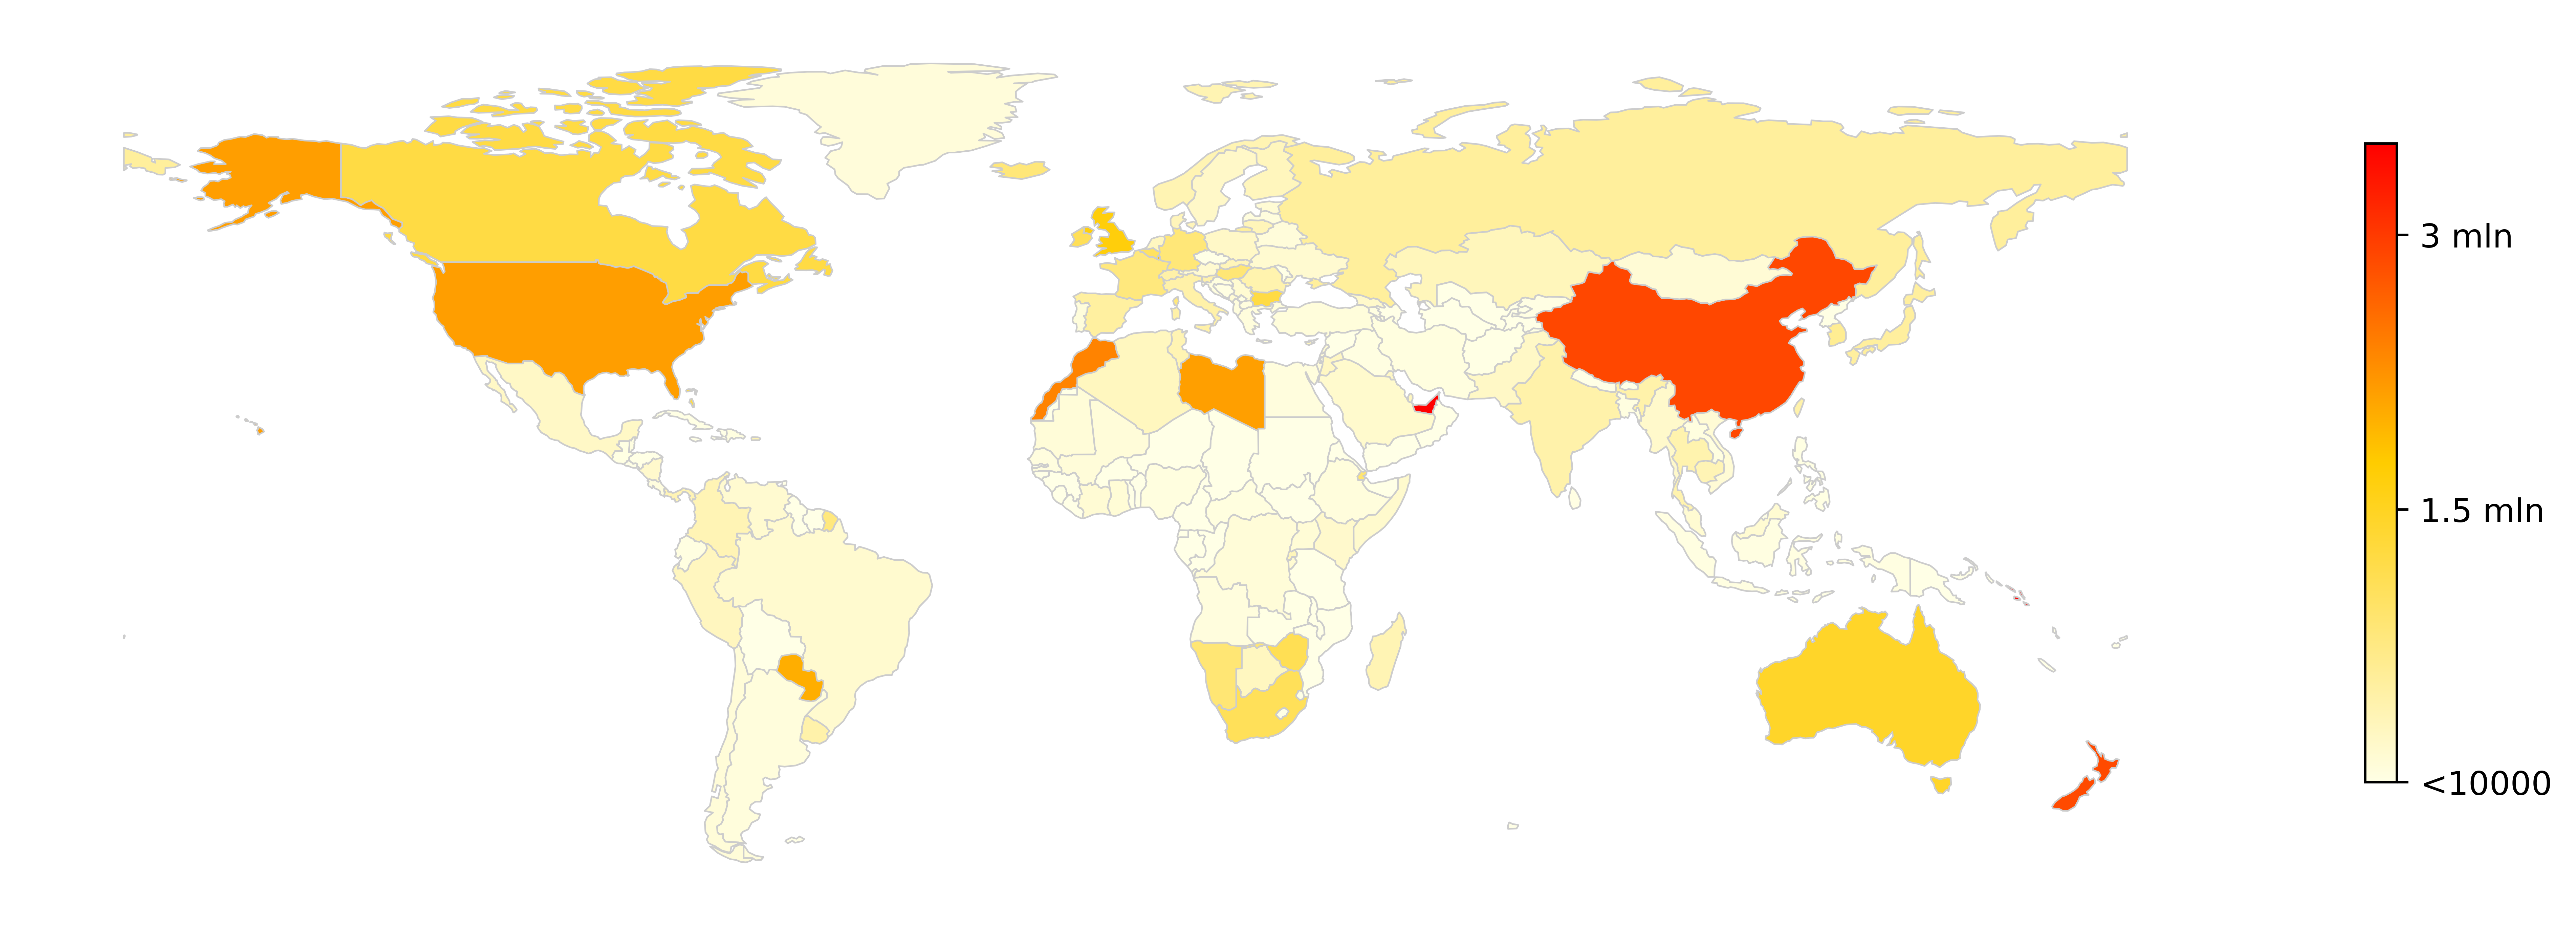

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

world = world[world['NAME'] != 'Antarctica']

norm = Normalize(vmin=10000, vmax=3500000)

fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=700)

colors = [(1, 1, 0.9), (1, 0.8, 0), (1, 0, 0)]  
positions = [0, 0.33, 0.66, 1]
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=1024) 

plot = world.plot(column='budget', cmap=cmap, alpha=1, linewidth=0.5, ax=ax, edgecolor='0.8', legend=False, norm=norm)

cbar = fig.colorbar(plot.get_children()[0], ax=ax, shrink=0.5) 
cbar.set_ticks([10000,1500000, 3000000])  
cbar.set_ticklabels([ '<10000','1.5 mln', '3 mln'])

ax.set_title('')
ax.set_axis_off()
plt.show()


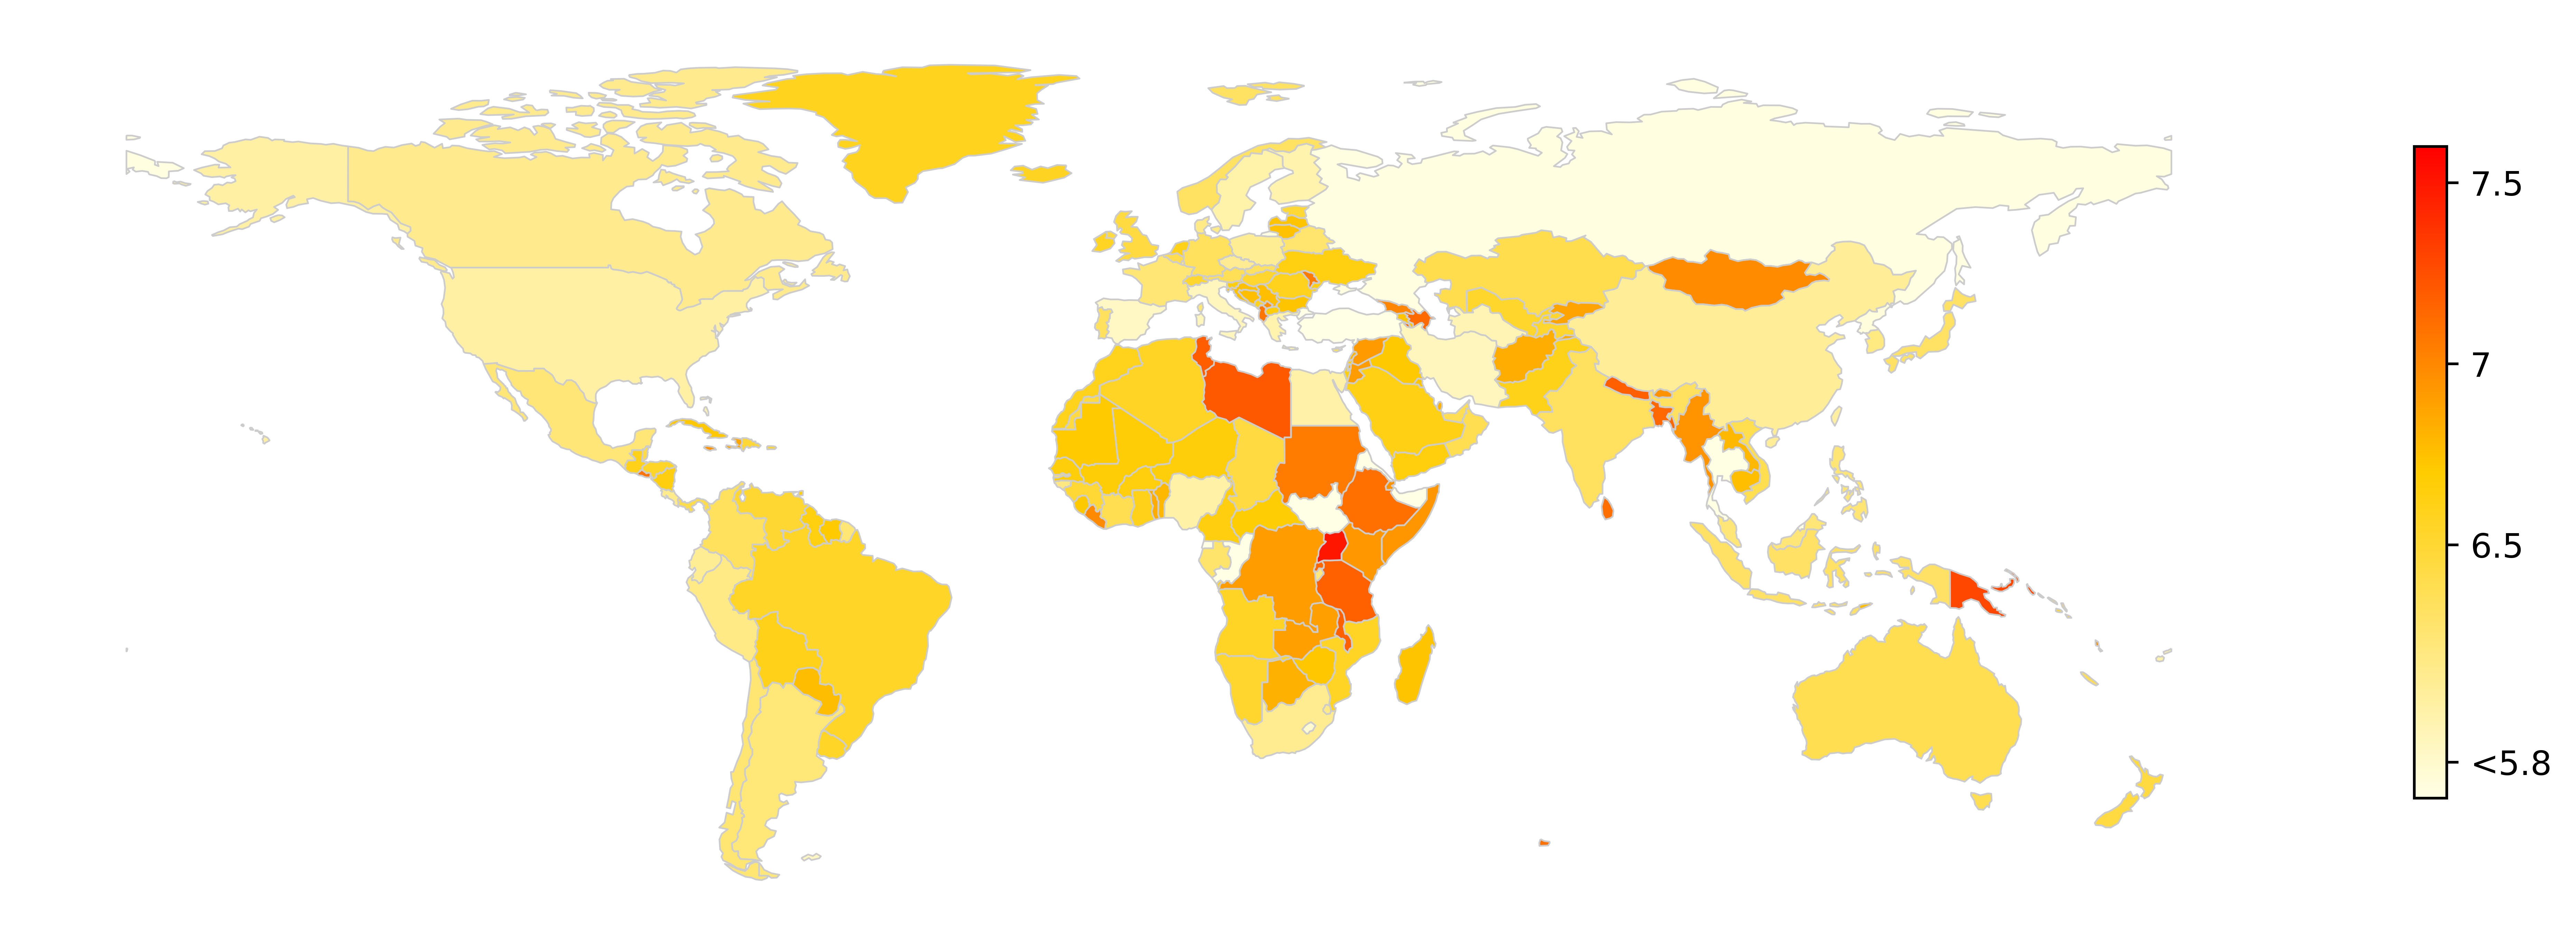

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

world = world[world['NAME'] != 'Antarctica']

norm = Normalize(vmin=5.8, vmax=7.6)

fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=700)

colors = [(1, 1, 0.9), (1, 0.8, 0), (1, 0, 0)] 
positions = [0, 0.33, 0.66, 1]
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=1024) 

plot = world.plot(column='averageRating', cmap=cmap, alpha=1, linewidth=0.5, ax=ax, edgecolor='0.8', legend=False, norm=norm)

cbar = fig.colorbar(plot.get_children()[0], ax=ax, shrink=0.5)  
cbar.set_ticks([5.9,6.5,7, 7.5]) 
cbar.set_ticklabels([ '<5.8','6.5','7', '7.5'])

ax.set_title('')
ax.set_axis_off()

plt.show()


In [59]:
import pandas as pd
file_path = 'poster_data.csv'
df = pd.read_csv(file_path)
print(df.shape)

(432152, 4)


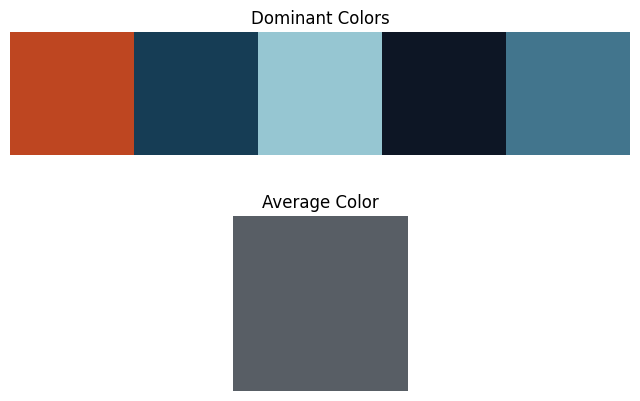

Color 1: RGB = [190  70  33]
Color 2: RGB = [22 61 85]
Color 3: RGB = [150 198 210]
Color 4: RGB = [13 22 37]
Color 5: RGB = [ 66 117 141]
Mean Color: RGB = [ 88  94 101]
Maximum Contrast: 9.76
av Contrast: 3.56
Colors with Maximum Contrast: [150 198 210] and [13 22 37]
Average Brightness: 0.18
Brightness of Color 1: 0.15
Brightness of Color 2: 0.04
Brightness of Color 3: 0.52
Brightness of Color 4: 0.01
Brightness of Color 5: 0.16


In [ ]:
import requests
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from io import BytesIO

def find_dominant_color_from_url(url, k=5):
    response = requests.get(url)
    img_data = BytesIO(response.content)
    
    img = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), cv2.IMREAD_COLOR)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_resized = cv2.resize(img_rgb, (img_rgb.shape[1]//2, img_rgb.shape[0]//2))
    
    pixels = img_resized.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    colors = kmeans.cluster_centers_

    colors = colors.round(0).astype(int)
    
    mean_color = np.mean(colors, axis=0).round(0).astype(int)
    
    return colors, mean_color

def luminance(color):
    r, g, b = [x / 255.0 for x in color]
    r = r / 12.92 if r <= 0.03928 else ((r + 0.055) / 1.055) ** 2.4
    g = g / 12.92 if g <= 0.03928 else ((g + 0.055) / 1.055) ** 2.4
    b = b / 12.92 if b <= 0.03928 else ((b + 0.055) / 1.055) ** 2.4
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

def contrast_ratio(color1, color2):
    L1 = luminance(color1)
    L2 = luminance(color2)
    if L1 > L2:
        return (L1 + 0.05) / (L2 + 0.05)
    else:
        return (L2 + 0.05) / (L1 + 0.05)

def find_max_contrast(colors):
    max_contrast = 0
    color_pair = None
    for i in range(len(colors)):
        for j in range(i + 1, len(colors)):
            contrast = contrast_ratio(colors[i], colors[j])
            if contrast > max_contrast:
                max_contrast = contrast
                color_pair = (colors[i], colors[j])
    return max_contrast, color_pair
def find_average_contrast(colors):
    total_contrast = 0
    num_comparisons = 0
    
    for i in range(len(colors)):
        for j in range(i + 1, len(colors)):
            contrast = contrast_ratio(colors[i], colors[j])
            total_contrast += contrast
            num_comparisons += 1
    
    average_contrast = total_contrast / num_comparisons if num_comparisons > 0 else 0
    return average_contrast
def average_brightness(colors):
    brightness_values = [luminance(color) for color in colors]
    avg_brightness = np.mean(brightness_values)
    return avg_brightness, brightness_values

def plot_colors(colors, mean_color):
    plt.figure(figsize=(8, 5))

    plt.subplot(2, 1, 1)
    plt.imshow([colors])
    plt.axis('off')
    plt.title('Dominant Colors')

    plt.subplot(2, 1, 2)
    plt.imshow([[mean_color]])
    plt.axis('off')
    plt.title('Average Color')

    plt.show()

    for i, color in enumerate(colors):
        print(f"Color {i + 1}: RGB = {color}")
    
    print(f"Mean Color: RGB = {mean_color}")

url = 'https://image.tmdb.org/t/p/w500//qJ2tW6WMUDux911r6m7haRef0WH.jpg'

dominant_colors, mean_color = find_dominant_color_from_url(url)

max_contrast, color_pair = find_max_contrast(dominant_colors)
av_contrast = find_average_contrast(dominant_colors)

avg_brightness, brightness_values = average_brightness(dominant_colors)

plot_colors(dominant_colors, mean_color)

print(f"Maximum Contrast: {max_contrast:.2f}")
print(f"av Contrast: {av_contrast:.2f}")

print(f"Colors with Maximum Contrast: {color_pair[0]} and {color_pair[1]}")

print(f"Average Brightness: {avg_brightness:.2f}")
for i, brightness in enumerate(brightness_values):
    print(f"Brightness of Color {i + 1}: {brightness:.2f}")


In [ ]:
import pandas as pd
import re

file_path = 'people_data.csv'
df = pd.read_csv(file_path)

print(df.iloc[1,2])
df['cast_directors_writers'] = df.apply(lambda row: 
    row['cast'].split(', ')[:3] + row['directors'].split(', ')[:3] + row['writers'].split(', ')[:3], axis=1)

print(df.iloc[1,6])
df = df.drop(columns=['cast', 'directors', 'writers'])
print(df)


Matthew McConaughey, Anne Hathaway, Michael Caine, Jessica Chastain, Casey Affleck, Wes Bentley, Topher Grace, Mackenzie Foy, Ellen Burstyn, John Lithgow
['Matthew McConaughey', 'Anne Hathaway', 'Michael Caine', 'Christopher Nolan', 'Jonathan Nolan', 'Christopher Nolan']
            id                                        title  averageRating  \
0        27205                                    Inception            8.8   
1       157336                                 Interstellar            8.7   
2          155                              The Dark Knight            9.0   
3        19995                                       Avatar            7.9   
4        24428                                 The Avengers            8.0   
...        ...                                          ...            ...   
432147  277907               Muhurtham Pathnonnu Muppathinu            7.2   
432148  782632                             Shot in the Back            5.5   
432149  782607  Tango in P

In [ ]:
all_elements = [item for sublist in df['cast_directors_writers'] for item in sublist]

unique_elements = set(all_elements)

num_unique_elements = len(unique_elements)

print(num_unique_elements)

598972


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
import random
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import re
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import joblib
import time
 







def LinearRegressionModel(test_x, train_x, train_y, test_y,name):
    lr = LinearRegression()

    lr.fit(train_x, train_y)

    predict = lr.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Linear Regression - Mean Squared Error:', mse)
    print('Linear Regression - Mean Absolute Error:', mae)
    print('Linear Regression - R2 Score:', r2)
    joblib.dump(lr, name)  
    print(f'Model saved as {name}')

def SVR_alg(test_x, train_x, train_y, test_y, name):
    param_grid = {
        'kernel': ['poly'],
        'degree': [2],
        'C': [0.1, 1],
        'coef0': [1]
    }
    grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_params = grid_search.best_params_
    print(f'Best parameters: {best_params}')

    clf = SVR(
        kernel=best_params['kernel'],
        degree=best_params['degree'],
        C=best_params['C'],
        coef0=best_params['coef0']
    )

    clf.fit(train_x, train_y)

    predict = clf.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('________________Результаты модели_________________')
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('R2 Score:', r2)
    print('________________Опорные вектора_________________')
    support_vectors = clf.support_
    print('Количество опорных векторов:', len(support_vectors))


    joblib.dump(clf, name)  
    print(f'Model saved as {name}')


def KNN_alg(test_x, train_x, train_y, test_y,name):

    param_grid = {'n_neighbors': np.arange(40, 100, 30)}  # Пример с шагом 2 (от 3 до 20)
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f'Best number of neighbors: {best_n_neighbors}')

    knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn.fit(train_x, train_y)

    predict = knn.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R2 Score:', r2)
    joblib.dump(knn, name)  
    print(f'Model saved as {name}')

def RandomForest(test_x, train_x, train_y, test_y, name):
    param_grid = {'n_estimators': np.arange(3, 7, 4)}  
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_estimators = grid_search.best_params_['n_estimators']
    print(f'Best number of estimators: {best_n_estimators}')

    rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
    rfr.fit(train_x, train_y)

    predict = rfr.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Random Forest - Mean Squared Error:', mse)
    print('Random Forest - Mean Absolute Error:', mae)
    print('Random Forest - R2 Score:', r2)

    joblib.dump(rfr, name)  
    print(f'Model saved as {name}')


mlb = MultiLabelBinarizer(sparse_output=True)
one_hot = mlb.fit_transform(df['cast_directors_writers'])
X=one_hot
Y=df['averageRating']
joblib.dump(mlb, 'mbl_data.joblib')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# LinearRegressionModel
# start_time = time.time()
# LinearRegressionModel(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='linear_people.joblib')
# print(f"LinearRegressionModel time: {time.time() - start_time} seconds")
# print()

# # KNN_alg
# start_time = time.time()
# KNN_alg(test_x=X_test, train_x=X_train, train_y=Y_train, test_y=Y_test, name='knn_people.joblib')
# print(f"KNN_alg time: {time.time() - start_time} seconds")
# print()

start_time = time.time()
SVR_alg(test_x=X_test, train_x=X_train[:100000], train_y=Y_train[:100000], test_y=Y_test, name='svr_people.joblib')
print(f"SVR_alg time: {time.time() - start_time} seconds")
print()

start_time = time.time()
RandomForest(test_x=X_test, train_x=X_train[:10000], train_y=Y_train[:10000], test_y=Y_test, name='forest_people.joblib')
print(f"RandomForest time: {time.time() - start_time} seconds")
print()




In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
import random
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import re
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import joblib
from scipy.sparse import hstack

import time






# def naiveB(test_x,train_x,train_y,test_y):

#     train_x = train_x.toarray()  # Преобразуем в плотный массив
#     test_x = test_x.toarray()  # Преобразуем в плотный массив

#     clf = GaussianProcessRegressor()
#     clf.fit(train_x, train_y)
#     # Преобразуем новые предложения в матрицу признаков и классифицируем их
#     predict = clf.predict(test_x)
#    # Прогнозируем на тестовых данных

#     # Оценка модели
#     mse = mean_squared_error(test_y, predict)
#     mae = mean_absolute_error(test_y, predict)
#     r2 = r2_score(test_y, predict)

#     # Выводим результаты
#     print('________________Результаты модели_________________')
#     print('Mean Squared Error (MSE):', mse)
#     print('Mean Absolute Error (MAE):', mae)
#     print('R2 Score:', r2)



def LinearRegressionModel(test_x, train_x, train_y, test_y,name):
    lr = LinearRegression()

    lr.fit(train_x, train_y)

    predict = lr.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Linear Regression - Mean Squared Error:', mse)
    print('Linear Regression - Mean Absolute Error:', mae)
    print('Linear Regression - R2 Score:', r2)
    joblib.dump(lr, name)  
    print(f'Model saved as {name}')

def SVR_alg(test_x, train_x, train_y, test_y, name):
    param_grid = {
        'kernel': ['poly'],
        'degree': [2, 3],
        'C': [0.1, 1, 10],
        'coef0': [0, 1]
    }
    grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_params = grid_search.best_params_
    print(f'Best parameters: {best_params}')

    clf = SVR(
        kernel=best_params['kernel'],
        degree=best_params['degree'],
        C=best_params['C'],
        coef0=best_params['coef0']
    )

    clf.fit(train_x, train_y)

    predict = clf.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('________________Результаты модели_________________')
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('R2 Score:', r2)
    print('________________Опорные вектора_________________')
    support_vectors = clf.support_
    print('Количество опорных векторов:', len(support_vectors))

    joblib.dump(clf, name)  
    print(f'Model saved as {name}')


def KNN_alg(test_x, train_x, train_y, test_y,name):

    param_grid = {'n_neighbors': np.arange(40, 100, 30)}  
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f'Best number of neighbors: {best_n_neighbors}')

    knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn.fit(train_x, train_y)

    predict = knn.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R2 Score:', r2)
    joblib.dump(knn, name)  
    print(f'Model saved as {name}')

def RandomForest(test_x, train_x, train_y, test_y, name):
    param_grid = {'n_estimators': np.arange(3, 7, 4)}  
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(train_x, train_y)

    best_n_estimators = grid_search.best_params_['n_estimators']
    print(f'Best number of estimators: {best_n_estimators}')

    rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
    rfr.fit(train_x, train_y)

    predict = rfr.predict(test_x)

    mse = mean_squared_error(test_y, predict)
    mae = mean_absolute_error(test_y, predict)
    r2 = r2_score(test_y, predict)

    print('Random Forest - Mean Squared Error:', mse)
    print('Random Forest - Mean Absolute Error:', mae)
    print('Random Forest - R2 Score:', r2)

    joblib.dump(rfr, name)  
    print(f'Model saved as {name}')

file_path = 'language_data.csv'
df = pd.read_csv(file_path)

# df['tagline'] = df['tagline'].apply(lambda x: x.split())  # или .split(',') если запятые
# df['keywords'] = df['keywords'].apply(lambda x: x.split())  # или .split(',') если запятые
# df['overview'] = df['overview'].apply(lambda x: x.split())  # или .split(',') если запятые
tfidf_tagline = TfidfVectorizer(stop_words='english')
tagline_tfidf = tfidf_tagline.fit_transform(df['tagline'])

tfidf_keywords = TfidfVectorizer(stop_words='english')
keywords_tfidf = tfidf_keywords.fit_transform(df['keywords'])

tfidf_overview = TfidfVectorizer(stop_words='english')
overview_tfidf = tfidf_overview.fit_transform(df['overview'])

joblib.dump(tagline_tfidf, 'tagline_tfidf.joblib')

joblib.dump(keywords_tfidf, 'keywords_tfidf.joblib')

joblib.dump(overview_tfidf, 'overview_tfidf.joblib')

X = hstack([tagline_tfidf, keywords_tfidf, overview_tfidf])
Y=df['averageRating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
start_time = time.time()
LinearRegressionModel(test_x=X_test, train_x=X_train[:1000], train_y=Y_train[:1000], test_y=Y_test, name='linear_language.joblib')
print(f"LinearRegressionModel time: {time.time() - start_time} seconds")
print()
# KNN_alg
start_time = time.time()
KNN_alg(test_x=X_test, train_x=X_train[:1000], train_y=Y_train[:1000], test_y=Y_test, name='knn_language.joblib')
print(f"KNN_alg time: {time.time() - start_time} seconds")
print()
# RandomForest
start_time = time.time()
SVR_alg(test_x=X_test, train_x=X_train[:1000], train_y=Y_train[:1000], test_y=Y_test, name='svr_language.joblib')
print(f"SVR_alg time: {time.time() - start_time} seconds")
print()

start_time = time.time()
RandomForest(test_x=X_test, train_x=X_train[:1000], train_y=Y_train[:1000], test_y=Y_test, name='forest_language.joblib')
print(f"RandomForest time: {time.time() - start_time} seconds")
print()
# SVR_alg



Linear Regression - Mean Squared Error: 1.7239975567853052
Linear Regression - Mean Absolute Error: 1.0244496252987083
Linear Regression - R2 Score: 0.002420243237902242
Model saved as linear_language.joblib
LinearRegressionModel time: 0.4073455333709717 seconds

Best number of neighbors: 70
Mean Squared Error: 1.7324263007517013
Mean Absolute Error: 1.0285745161094113
R2 Score: -0.0024569935787706054
Model saved as knn_language.joblib
KNN_alg time: 6.068087100982666 seconds

Best parameters: {'C': 1, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
________________Результаты модели_________________
Mean Squared Error (MSE): 1.6847913374961883
Mean Absolute Error (MAE): 1.0064474183709156
R2 Score: 0.025106662106690325
________________Опорные вектора_________________
Количество опорных векторов: 941
Model saved as svr_language.joblib
SVR_alg time: 48.21628952026367 seconds

Best number of estimators: 3
Random Forest - Mean Squared Error: 1.9790544103188668
Random Forest - Mean Absolute Error

In [ ]:
import pandas as pd
import joblib
df = joblib.load('data_img.joblib')
print(df.shape)

In [ ]:
import pandas as pd
import requests
import numpy as np
import cv2
from sklearn.cluster import KMeans
from io import BytesIO
import base64



#def count_faces(response):
   # if response.status_code != 200:
   #     raise ValueError(f"Ошибка загрузки изображения: {response.status_code}")
   # image_array = np.array(bytearray(response.content), dtype=np.uint8)
    #image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
   # face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    #for (x, y, w, h) in faces:
   #     cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
   # return len(faces)



df['RGBHSV_Contrast'] = df['poster_img'].apply(find_dominant_color_from_url)
df[['R', 'G', 'B', 'H', 'S', 'V', 'Max_Contrast', 'Av_Contrast', 'Average_Brightness', 'Max_Brightness', 'Temperature']] = pd.DataFrame(df['RGBHSV_Contrast'].to_list(), index=df.index)
df = df.drop(columns=['RGBHSV_Contrast'])
df = df.drop(columns=['poster_img'])

df.to_csv('picture_data.csv', index=False)
